In [1]:
# 책에서처럼 일단 공동 import를 하자
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 불필요한 warning이 나오지 않도록 하는 곳
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# logistic regression을 활용할 예정
from sklearn.linear_model import LogisticRegression

In [3]:
# mnist 데이터셋을 불러오자
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist.data.shape, mnist.target.shape)

(70000, 784) (70000,)


In [4]:
# mnist 데이터셋 속 숫자들은 어떻게 구성이 되어있는가?
print(type(mnist.data))
print(type(mnist.data.loc[0]))
print(mnist.data.loc[0])
print(type(mnist.target))
print(mnist.target)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64
<class 'pandas.core.series.Series'>
0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


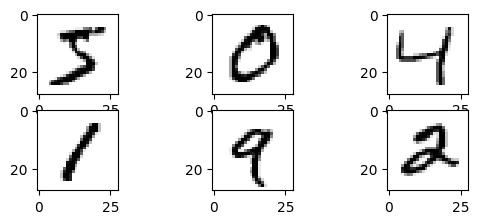

In [5]:
# mnist set들을 출력해보자
# mnist set을 출력하기 위해서는 mnist set을 numpy로 바꾼 후에 plt로 출력해야 한다.

image = mnist.data.to_numpy()

plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

plt.subplot(432)
plt.imshow((image[1].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

plt.subplot(433)
plt.imshow((image[2].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

plt.subplot(434)
plt.imshow((image[3].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

plt.subplot(435)
plt.imshow((image[4].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')

plt.subplot(436)
plt.imshow((image[5].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')



In [6]:
# train set과 test set을 분리해야 한다.
# train과 test set을 그냥 numpy형태로 다 바꿔서 귀찮게 하지 말자.
from sklearn.model_selection import train_test_split
mnist_data = mnist.data.to_numpy()
mnist_target = mnist.target.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(mnist_data, mnist_target, test_size=0.9, random_state=0)
# 잘 나뉘었는가 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 784)
(63000, 784)
(7000,)
(63000,)


#### 기록
##### 이전 기록
- 디폴트 100번도 안되고 1000번도 max_iter를 늘리라고 해서 10000번으로 늘려봤다.
- 계속 해도 converge 되지 않아서 train data / test data의 사이즈를 0.9/0.1에서 기본값인 0.75/0.25로 줄였다.
- 그래도 converge 되지 않아서 tol을 기본값인 1e-4에서 1e-3으로 줄였다.
- 그래도 converge 되지 않아서 tol값에 변화를 주지 말고 L2 규제 계수 C=0.1로 두었다
- 그래도 converge 되지 않아서 tol값에 변화를 주지 말고 L2 규제 계수 C=0.01로 두었다.
- 시간이 너무 오래 걸려서 solver를 saga로 바꾸고, l1 규제를 적용했다. max_iter랑 C는 기본값으로 두었다.
- 그래도 converge 되지 않아서 max_iter를 1000번, C=0.1로 두고 다시 돌려보았다.
- 큰 차이가 없는거 같은데... 시간이 더 오래 걸리고.... 그냥 n_jobs를 넣지 말자. 그리고 코랩에서 돌리면 되지 않을까.
- train set의 크기를 7000개로 줄여서 다시 시도. n_jobs=-1로 두고. >> 확실히 학습하는 시간이 대폭 줄기는 했다. 다른 모델들도 이렇게 해야 겠다.
- 다른 모델들은 학습시간이 겁나 짧은데 너는 왜그러는 거니???
- scikit-learn에서 찾은 바로는 거기서도 샘플을 5000개로 사용하고, tol=0.1로 주었다. 이대로 해볼까. 
- tolorence가 문제였구먼 이거...... 일단 tol=0.1을 고정을 해놔야 엥간한 상황에서 converge가 된다.
- tol을 최대한 줄이면 어디까지 갈 수 있나? >> 0.0025까지는 줄일 수 있다.
##### penalty='l1', C=0.1, solver='saga', tol=0.1 일때
- train accuracy : 0.929 test accuracy : 0.905
##### penalty='l1', C=0.1, solver='saga', max_iter=5000, tol=0.005
- tol=0.005, max_iter=5000으로 잡고 계산하면 된다. 이러면 한 모델당 50초 정도 시간이 걸린다.
##### penalty='l1', C=0.1, solver='saga', max_iter=5000, tol=0.0025
- 이렇게 세팅하면 한 모델당 학습 시간이 2분 걸린다.
- 이게 마지노선일듯. 여기서 C값의 변화에 따라 어떻게 정확도가 높아지는지, penalty를 어떻게 주느냐에 따라 결과가 달라지는 지를 기록해보자.
##### penalty='l1'으로 고정하고 C값을 log scale로 변화를 줘가며 학습시켜 train accuracy와 test accuracy를 구해보자
- c=0.001일때 test accuracy : 0.896으로 가장 높다. 또한 train accuracy : 0.929로 과적합 되지도 않았다. 
##### penalty='l2'으로 고정하고 C값을 log scale로 변화를 줘가며 학습시켜 train accuracy와 test accuracy를 구해보자
- c=0.00001일때 test accuracy 0.9, train accuracy 0.966으로 제일 결과가 좋았다. 
- 만약에 c 값이 적으면 적을수록 올라간다면 어디까지 걸어야 할까?
- c=1e-6에서 train accuracy 0.933, test accuracy 0.905로 늘어났다. 그 이후 값들은 모두 c=1e-6보다 안좋다.
##### penalty=elasticnet으로 설정하고, l1_ratio를 0.1 단위로 조절해가면서 학습한 모델들의 정확도를 확인해보자.
- l1_ratio에 따라서 계산했을때는 모두 c=1e-6, test accuracy 0.905, train accuracy 0.933이다.
- l1 ratio에 따른 경향은 크게 없었다. 
##### 결론
- 각각을 테스트해보았을때 l2를 사용했을 때 최적의 결과가 가장 좋은 모델이었다.

In [7]:
# penalty를 적용한 후 model을 C값에 따라 학습
# l1으로 적용한 후 계산해보고, 이후 l2로 바꾸어서 계산, 마지막으로는 'elasticnet'으로 계산. 이때 l1_ratio에 대한 적용은 나중에 다뤄보자
# l1 적용해보고, l2 적용해봐야 함.
Penalty = 'l2'
log_models = []
log_train_score = []
log_test_score = []
C_list = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001,1e-06, 1e-07, 1e-08]
for c in C_list:
    logModel = LogisticRegression(penalty=Penalty, C=c, solver='saga', max_iter=5000, tol=0.0025, n_jobs=-1)
    logModel.fit(X_train, y_train)
    log_train_score.append(logModel.score(X_train, y_train))
    log_test_score.append(logModel.score(X_test, y_test))
    log_models.append(logModel)
    print("accuracy of C={} calculated".format(c))

accuracy of C=100 calculated
accuracy of C=10 calculated
accuracy of C=1 calculated
accuracy of C=0.1 calculated
accuracy of C=0.01 calculated
accuracy of C=0.001 calculated
accuracy of C=0.0001 calculated
accuracy of C=1e-05 calculated
accuracy of C=1e-06 calculated
accuracy of C=1e-07 calculated
accuracy of C=1e-08 calculated


In [8]:
# train score와 test score를 출력하자
for c, trainScore, testScore in zip(C_list,log_train_score, log_test_score):
    print("c={} / train accuracy : {} / test accuracy : {} \n".format(c, trainScore, testScore))

c=100 / train accuracy : 0.995 / test accuracy : 0.8854920634920634 

c=10 / train accuracy : 0.9947142857142857 / test accuracy : 0.8855238095238095 

c=1 / train accuracy : 0.9948571428571429 / test accuracy : 0.8854603174603175 

c=0.1 / train accuracy : 0.9947142857142857 / test accuracy : 0.8855873015873016 

c=0.01 / train accuracy : 0.9945714285714286 / test accuracy : 0.8856031746031746 

c=0.001 / train accuracy : 0.9945714285714286 / test accuracy : 0.8862063492063492 

c=0.0001 / train accuracy : 0.9894285714285714 / test accuracy : 0.8892380952380953 

c=1e-05 / train accuracy : 0.9655714285714285 / test accuracy : 0.9003333333333333 

c=1e-06 / train accuracy : 0.9332857142857143 / test accuracy : 0.9046825396825396 

c=1e-07 / train accuracy : 0.8964285714285715 / test accuracy : 0.8853492063492063 

c=1e-08 / train accuracy : 0.8457142857142858 / test accuracy : 0.8368571428571429 



In [12]:
# elasticnet의 경우는 l1_ratio에 따라 그 결과를 뽑아야 하니 model을 따로 묶어서 담을만한 곳이 필요하다.
Penalty = 'elasticnet'
logmodel_elasticent = []
train_score_elasticent = []
test_score_elasticent = []
l1_ratio_list = [0.1*i for i in range(1,10)]
for l1_R in l1_ratio_list:
    print("calculating l1_ratio={}".format(l1_R))
    for c in C_list:
        logModel = LogisticRegression(penalty=Penalty, C=c, solver='saga', max_iter=5000, tol=0.0025, n_jobs=-1, l1_ratio=l1_R)
        logModel.fit(X_train, y_train)
        log_train_score.append(logModel.score(X_train, y_train))
        log_test_score.append(logModel.score(X_test, y_test))
        log_models.append(logModel)
        print("accuracy of C={} calculated".format(c))
    logmodel_elasticent.append(log_models)
    train_score_elasticent.append(log_train_score)
    test_score_elasticent.append(log_test_score)
    print("accuracy of l1_ratio={} calculated".format(l1_R))

calculating l1_ratio=0.1
accuracy of C=100 calculated
accuracy of C=10 calculated
accuracy of C=1 calculated
accuracy of C=0.1 calculated
accuracy of C=0.01 calculated
accuracy of C=0.001 calculated
accuracy of C=0.0001 calculated
accuracy of C=1e-05 calculated
accuracy of C=1e-06 calculated
accuracy of C=1e-07 calculated
accuracy of C=1e-08 calculated
accuracy of l1_ratio=0.1 calculated
calculating l1_ratio=0.2
accuracy of C=100 calculated
accuracy of C=10 calculated
accuracy of C=1 calculated
accuracy of C=0.1 calculated
accuracy of C=0.01 calculated
accuracy of C=0.001 calculated
accuracy of C=0.0001 calculated
accuracy of C=1e-05 calculated
accuracy of C=1e-06 calculated
accuracy of C=1e-07 calculated
accuracy of C=1e-08 calculated
accuracy of l1_ratio=0.2 calculated
calculating l1_ratio=0.30000000000000004
accuracy of C=100 calculated
accuracy of C=10 calculated
accuracy of C=1 calculated
accuracy of C=0.1 calculated
accuracy of C=0.01 calculated
accuracy of C=0.001 calculated
acc

In [13]:
# elasticent 에서 정확도를 출력하는 부분
for i, l1_R in enumerate(l1_ratio_list):
    trainScore_list = train_score_elasticent[i]
    testScore_list = test_score_elasticent[i]
    for c, trainScore, testScore in zip(C_list,trainScore_list, testScore_list):
        print("l1_ratio={} c={} / train accuracy : {} / test accuracy : {} \n".format(l1_R, c, trainScore, testScore))

l1_ratio=0.1 c=100 / train accuracy : 0.995 / test accuracy : 0.8854920634920634 

l1_ratio=0.1 c=10 / train accuracy : 0.9947142857142857 / test accuracy : 0.8855238095238095 

l1_ratio=0.1 c=1 / train accuracy : 0.9948571428571429 / test accuracy : 0.8854603174603175 

l1_ratio=0.1 c=0.1 / train accuracy : 0.9947142857142857 / test accuracy : 0.8855873015873016 

l1_ratio=0.1 c=0.01 / train accuracy : 0.9945714285714286 / test accuracy : 0.8856031746031746 

l1_ratio=0.1 c=0.001 / train accuracy : 0.9945714285714286 / test accuracy : 0.8862063492063492 

l1_ratio=0.1 c=0.0001 / train accuracy : 0.9894285714285714 / test accuracy : 0.8892380952380953 

l1_ratio=0.1 c=1e-05 / train accuracy : 0.9655714285714285 / test accuracy : 0.9003333333333333 

l1_ratio=0.1 c=1e-06 / train accuracy : 0.9332857142857143 / test accuracy : 0.9046825396825396 

l1_ratio=0.1 c=1e-07 / train accuracy : 0.8964285714285715 / test accuracy : 0.8853492063492063 

l1_ratio=0.1 c=1e-08 / train accuracy : 0.84

prediction with plot // penalty=elasticnet l1_ratio=0.2 C=1e-06
prediction 1 : 2
prediction 2 : 6
prediction 3 : 2
prediction 4 : 2
prediction 5 : 4
prediction 6 : 3
prediction 7 : 9
prediction 8 : 8
prediction 9 : 0
prediction 10 : 8


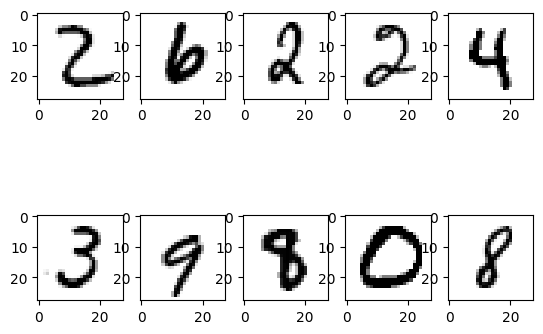

In [15]:
# test set에서 랜덤하게 10개를 뽑은 후 이를 출력해서 예측값과 실제 값이 맞는지 틀린지 확인해보자
rand_index = np.random.randint(low=0, high=len(X_test), size=10)

l1_ratio_index = 1
C_index = 8
#logReg = log_models[C_index]
logReg = logmodel_elasticent[l1_ratio_index][C_index]
print("prediction with plot // penalty={} l1_ratio={} C={}".format(Penalty,l1_ratio_list[l1_ratio_index],C_list[C_index]))
for randin, i in zip(rand_index, range(1,len(rand_index)+1)):
    predict = X_test[randin].reshape(1,-1)
    print("prediction {} : {}".format(i,logReg.predict(predict)[0]))
    plt.subplot(2,5,i)
    plt.imshow((X_test[randin].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')